In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
file_path = "/content/processed dataset.csv"
df = pd.read_csv(file_path, encoding='latin1')

In [ ]:
df.head()


,ÿCustomer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832,11,0.109175,0.018966,0.354981,4
1,10178643,13,0.167720,0.041494,0.407956,1
2,10513916,19,0.275227,0.072681,0.641183,4
3,10334589,19,0.273082,0.091841,0.637052,4
4,10458365,11,0.283937,0.116281,0.647737,4


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774061 entries, 0 to 774060
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ÿCustomer_ID      774061 non-null  int64  
 1   outlet_city       774061 non-null  int64  
 2   luxury_sales      774051 non-null  float64
 3   fresh_sales       774052 non-null  float64
 4   dry_sales         774053 non-null  float64
 5   cluster_catgeory  774061 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 35.4 MB


,0
ÿCustomer_ID,0
outlet_city,0
luxury_sales,10
fresh_sales,9
dry_sales,8
cluster_catgeory,0


In [ ]:
df.dropna(inplace=True)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:
file_path = "/content/processed dataset.csv"
df = pd.read_csv(file_path, encoding='latin1')


In [ ]:
df.columns

Index(['ÿCustomer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_catgeory'],
      dtype='object')

In [ ]:
X = df.drop(columns=['ÿCustomer_ID', 'cluster_catgeory'])
y = df['cluster_catgeory']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
X_scaled_df.head()


,outlet_city,luxury_sales,fresh_sales,dry_sales
0,0.280011,-0.709477,-1.101357,0.180595
1,0.626147,-0.330487,-1.010171,0.390344
2,1.664554,0.365463,-0.883936,1.313788
3,1.664554,0.351579,-0.806382,1.297433
4,0.280011,0.421845,-0.707456,1.339737


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:
file_path = "/content/processed dataset.csv"
df = pd.read_csv(file_path, encoding='latin1')


In [ ]:
df = df.drop(columns=['ÿCustomer_ID'])


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['cluster_catgeory']))

In [ ]:
df_scaled = pd.DataFrame(scaled_features, columns=df.drop(columns=['cluster_catgeory']).columns)


In [ ]:
df_scaled['cluster_catgeory'] = df['cluster_catgeory']


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#define features (X) and target (Y)
X = df_scaled.drop(columns=['cluster_catgeory'])
y = df_scaled['cluster_catgeory']

In [ ]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#verify the split
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (541842, 4)
Testing Set Size: (232219, 4)


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model = LogisticRegression()


In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=100)


In [ ]:
num_missing = df.isna().sum()
num_missing[:5]

,0
outlet_city,0
luxury_sales,10
fresh_sales,9
dry_sales,8
cluster_catgeory,0


In [ ]:
missing_records = df[df.isna().any(axis=1)]
missing_records

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
80031,11,NaN,0.045785,0.402539,4
148017,2,0.066388,0.031968,NaN,4
161798,16,0.059597,NaN,0.230005,4
174618,5,0.088368,0.343874,NaN,2
174701,15,0.078826,NaN,0.070093,2
174707,7,0.068379,0.312804,NaN,2
175265,17,NaN,0.280509,NaN,2
268558,16,0.201288,NaN,NaN,2
296608,16,NaN,0.567133,NaN,2
297898,11,NaN,0.259584,0.041472,2


In [ ]:
df['luxury_sales'].fillna(df['luxury_sales'].mean(), inplace=True)
df['fresh_sales'].fillna(df['fresh_sales'].mean(), inplace=True)
df['dry_sales'].fillna(df['dry_sales'].mean(), inplace=True)


<ipython-input-34-88b4d7c92074>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['luxury_sales'].fillna(df['luxury_sales'].mean(), inplace=True)
<ipython-input-34-88b4d7c92074>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
#verifying the missing values are handled
print(df.isnull().sum())


outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


In [ ]:
print(X_train.isnull().sum())

outlet_city     0
luxury_sales    6
fresh_sales     6
dry_sales       7
dtype: int64


In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
print(df.isnull().sum())

outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


In [ ]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)


In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64
0


In [ ]:
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [ ]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [[ -0.75888313 -37.63117568  10.56036551  26.87249347]
 [  0.76907503 -37.56526279  25.06368663   9.52527549]
 [ -0.86751503   3.16420368  -4.17038346  -4.15051483]
 [  0.52004581  14.1232018  -61.83717321   3.11784659]
 [  0.84073197   3.35687756  -6.07162914  -6.91017056]
 [ -0.52374924  13.48150689   3.28816524 -58.8847828 ]]
Model Intercept: [-22.91970968 -24.48326428  -7.45543774 -50.27961381  -9.68246303
 -51.52394987]


In [ ]:
y_train_pred = model.predict(X_train)


In [ ]:
y_test_pred = model.predict(X_test)


In [ ]:
print("Training Predictions:\n", y_train_pred[:10])
print("Test Predictions:\n", y_test_pred[:10])


Training Predictions:
 [3 1 6 4 4 4 1 6 5 4]
Test Predictions:
 [1 2 2 6 4 2 4 4 6 1]


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


Checking the model accuracy

In [ ]:
#model accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9619
Testing Accuracy: 0.9617


Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt


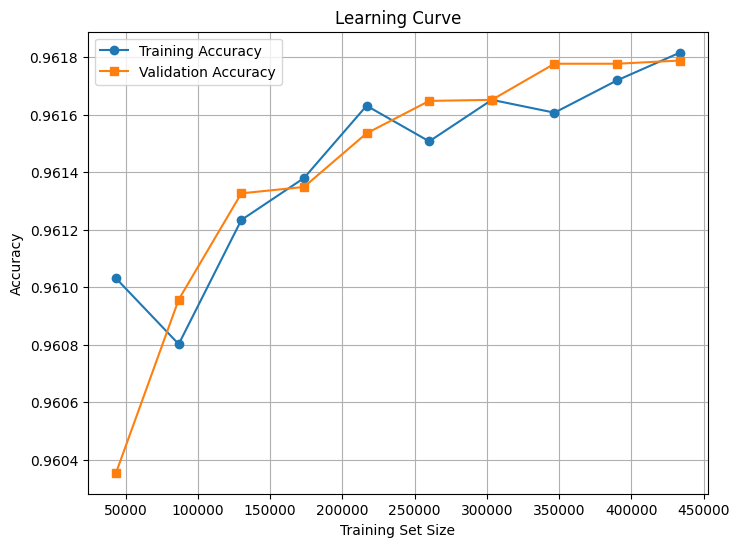

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()


ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc


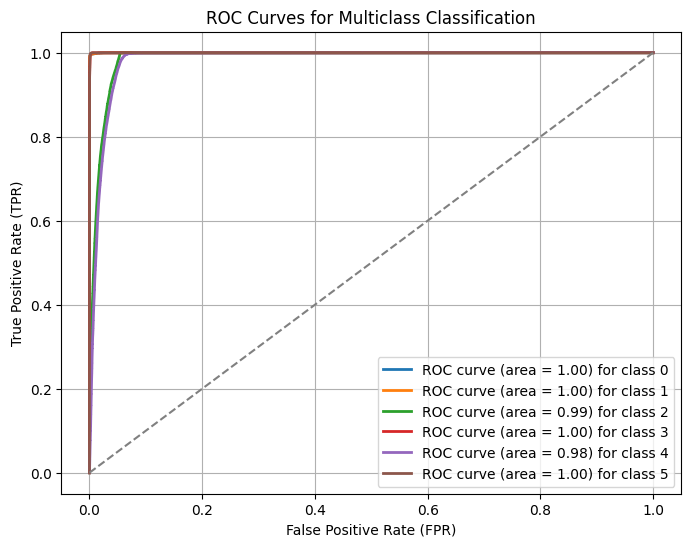

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Binarize the target variable (y_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get probability scores for all classes
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Multiclass Classification")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Loss curve

In [ ]:
import seaborn as sns


<ipython-input-56-d212b2f54a52>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train Loss', 'Test Loss'], y=[train_loss, test_loss], palette='viridis')


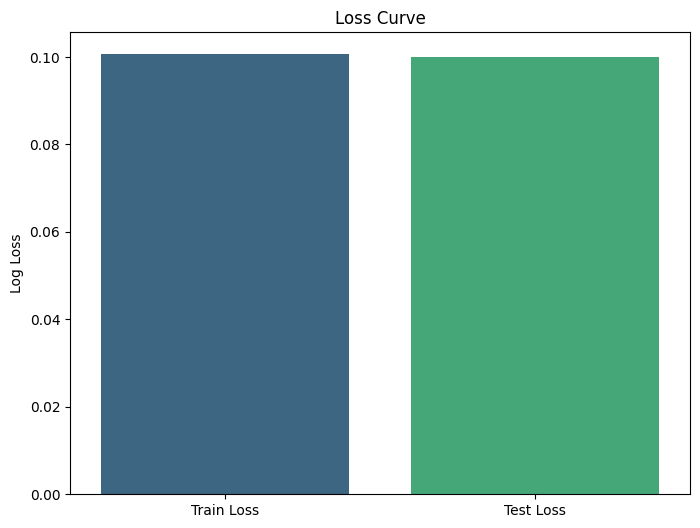

In [ ]:
from sklearn.metrics import log_loss

# Get probabilities for all classes
train_probs = model.predict_proba(X_train)
test_probs = model.predict_proba(X_test)

# Calculate log loss considering all classes
train_loss = log_loss(y_train, train_probs, labels=model.classes_)
test_loss = log_loss(y_test, test_probs, labels=model.classes_)

# Plot Loss Curve
plt.figure(figsize=(8, 6))
sns.barplot(x=['Train Loss', 'Test Loss'], y=[train_loss, test_loss], palette='viridis')
plt.ylabel("Log Loss")
plt.title("Loss Curve")
plt.show()


Box Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


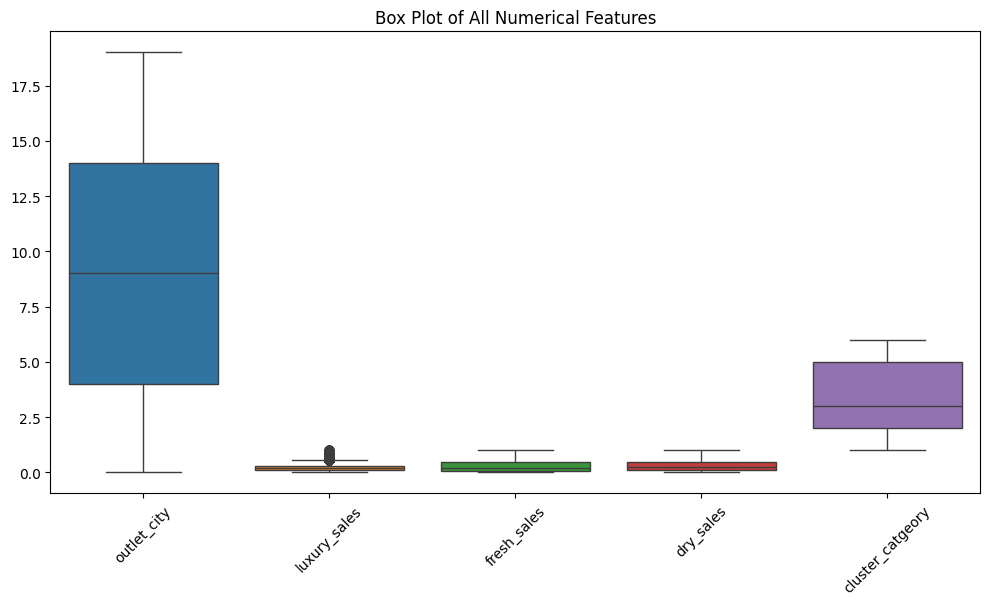

In [ ]:
#box plot for numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title("Box Plot of All Numerical Features")
plt.show()
